# The Simpsons characters

## Download the data

In [1]:
!mkdir data
!wget https://www.dropbox.com/s/7mc0xzbtkl0ppwx/simpsons.zip -P ./data/
!unzip ./data/simpsons.zip -d ./data > /dev/null

--2018-06-02 10:43:31--  https://www.dropbox.com/s/7mc0xzbtkl0ppwx/simpsons.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/content_link/IdU29T5mdgitrIIeDQed2SsC6pGoYP7DvnxCnqP6cMdnibtiA9NmNoN8qbvi8A1p/file [following]
--2018-06-02 10:43:31--  https://dl.dropboxusercontent.com/content_link/IdU29T5mdgitrIIeDQed2SsC6pGoYP7DvnxCnqP6cMdnibtiA9NmNoN8qbvi8A1p/file
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.65.6, 2620:100:6021:6::a27d:4106
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.65.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 420348254 (401M) [application/zip]
Saving to: ‘./data/simpsons.zip’

simpsons.zip        100%[===================>] 400.88M  33.5MB/s    in 12s     

2018-06-

In [0]:
!rm ./data/simpsons.zip

Subset of the [Simpsons character Dataset](https://www.kaggle.com/alexattia/the-simpsons-characters-dataset)  

There are about 1000 images in each class, split between the train and validation datasets in the 85:15 ratio.

![alt text](http://crysa.fzu.cz/karla/dl_img/simpsons.png)

## Load libraries

In [0]:
import matplotlib.pyplot as plt
from pathlib import Path
import cv2
import numpy as np
from matplotlib import patches, patheffects
import matplotlib
from google.colab import files

In [3]:
from keras import backend as K
from keras.models import Model
from keras.layers import Flatten, Dense, GlobalAveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [0]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax
  
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])
  
def draw_text(ax, xy, txt, sz=14):
    text = ax.text(*xy, txt,
           verticalalignment='top', color='white', fontsize=sz, weight='bold')
    draw_outline(text, 1)

In [0]:
map_characters = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson', 
        3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
        7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson', 
        11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak', 
        14: 'ned_flanders', 15: 'principal_skinner', 16: 'sideshow_bob'}

SZ = 150
BS = 64
num_classes = len(map_characters)

## Transfer learning

Try to train your Simpsons characters classifier on top of of VGG 16.

**Hints: **  
We have 16 different characters, so instead of binary_crossentropy and sigmoid, we are going to use categorical_crossentropy ad softmax.  
The dataset is small, so data augumentation may help.

In [6]:
base_model = # your code here

58892288/58889256 [==============================] - 7s 0us/step


In [0]:
x = base_model.output
x = GlobalAveragePooling2D()(x) 
x = Dense(1024, activation = 'relu')(x) # black magic, trial and error :-)
x = Dropout(0.2)(x)
predictions = # your code here
model = # your code here

Make sure to train only the newly added layers and compile the model:

In [0]:
# your code here

In [0]:
train_datagen =  ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=35,  
    width_shift_range=0.1,  
    height_shift_range=0.1, 
    horizontal_flip=True, 
    shear_range=0.1
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)


In [19]:
train_generator = 

validation_generator = 

Found 14012 images belonging to 17 classes.
Found 2474 images belonging to 17 classes.


Train your classifier and save its output to a variable.  Tou may need more epochs than 3.
Don't be scared by lower accuracy! We have 17 categories instead of 2. Totally random classifier would have accuracy about 6 %.

In [0]:
%%time
history = model.fit_generator # your code here

Plot the model accuracy during the training

In [28]:
# print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


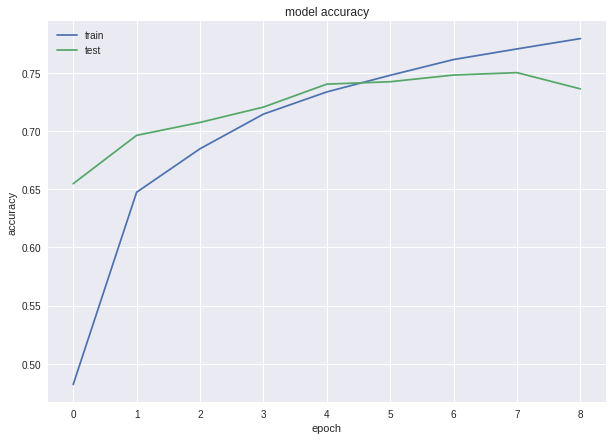

In [56]:
plt.figure(figsize=(10, 7))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc']) 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

## Check predictions for the validation set

In [0]:
y_true = 

In [0]:
preds = 

In [0]:
y_pred = np.argmax(preds, axis=1) # we are looking for a class with maximum score

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

In [0]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    (This function is copied from the scikit docs.)
    """
    plt.figure(figsize=(12, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Try to plot confusion matrix and check which characters are missclassified most often.

In [0]:
# your code here


Plot some corectly and incorrectly classified images.

In [0]:
# your code here